In [62]:
from sklearn import datasets, decomposition, preprocessing, pipeline, covariance
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

In [22]:
X, y = datasets.fetch_olivetti_faces(return_X_y=True)

In [175]:
p = pipeline.make_pipeline(preprocessing.StandardScaler(), decomposition.PCA(n_components=20))
Xp = p.fit_transform(X)
covie = covariance.EmpiricalCovariance().fit(Xp)

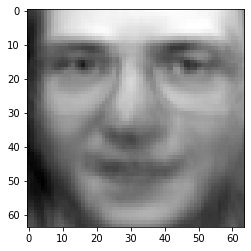

In [183]:
plt.imshow(p.inverse_transform(scs.multivariate_normal(covie.location_, covie.covariance_).rvs()[None, :]).reshape( (64, 64) ), cmap='gray')

In [55]:
p._final_estimator.explained_variance_ratio_

array([0.26876453, 0.12342378, 0.07841407], dtype=float32)

In [59]:
ic = pipeline.make_pipeline(preprocessing.StandardScaler(), decomposition.FastICA(n_components=3, max_iter=1000))
Xic = ic.fit_transform(X)

In [56]:
@interact
def faceviz(
        pc1=FloatSlider(min=-900, max=900, step=1, value=0, description='PC1'),
        pc2=FloatSlider(min=-900, max=900, step=1, value=0, description='PC2'),
        pc3=FloatSlider(min=-900, max=900, step=1, value=0, description='PC3'),
        ):
    foto = p.inverse_transform(np.array([[pc1, pc2, pc3]]))
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(foto.reshape( (64, 64) ), cmap='gray')
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.scatter(Xp[:, 0], Xp[:, 1], Xp[:, 2])
    ax.scatter(pc1, pc2, pc3, c='r', s=100)

interactive(children=(FloatSlider(value=0.0, description='PC1', max=900.0, min=-900.0, step=1.0), FloatSlider(…

In [61]:
@interact
def faceviz(
        ic1=FloatSlider(min=-0.2, max=0.2, step=0.01, value=0, description='IC1'),
        ic2=FloatSlider(min=-0.2, max=0.2, step=0.01, value=0, description='IC2'),
        ic3=FloatSlider(min=-0.2, max=0.2, step=0.01, value=0, description='IC3'),
        ):
    foto = ic.inverse_transform(np.array([[ic1, ic2, ic3]]))
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(foto.reshape( (64, 64) ), cmap='gray')
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.scatter(Xic[:, 0], Xic[:, 1], Xic[:, 2])
    ax.scatter(ic1, ic2, ic3, c='r', s=100)

interactive(children=(FloatSlider(value=0.0, description='IC1', max=0.2, min=-0.2, step=0.01), FloatSlider(val…

In [72]:
import scipy.stats as scs

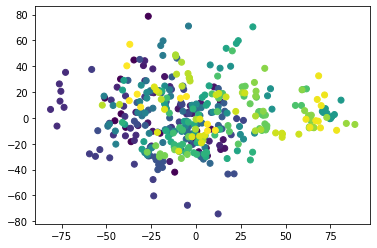

In [26]:
plt.scatter(Xp[:, 0], Xp[:, 1], c=y)

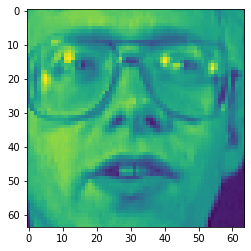

In [20]:
plt.imshow(X[13].reshape(64, 64))